# Indicators

## Setup

### Drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/quality-of-life

/content/drive/MyDrive/quality-of-life


### Imports

In [4]:
!pip install geopandas

In [5]:
import geopandas as gpd

## Districts

including
- population
- area
- density

In [6]:
districts = gpd.read_file('VG250_KRS.shp')

In [7]:
districts.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
districts.shape

(430, 28)

In [9]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJID     430 non-null    object  
 1   BEGINN    430 non-null    object  
 2   ADE       430 non-null    int64   
 3   GF        430 non-null    int64   
 4   BSG       430 non-null    int64   
 5   ARS       430 non-null    object  
 6   AGS       430 non-null    object  
 7   SDV_ARS   430 non-null    object  
 8   GEN       430 non-null    object  
 9   BEZ       430 non-null    object  
 10  IBZ       430 non-null    int64   
 11  BEM       430 non-null    object  
 12  NBD       430 non-null    object  
 13  SN_L      430 non-null    object  
 14  SN_R      430 non-null    object  
 15  SN_K      430 non-null    object  
 16  SN_V1     430 non-null    object  
 17  SN_V2     430 non-null    object  
 18  SN_G      430 non-null    object  
 19  FK_S3     430 non-null    object  
 20  NU

In [10]:
districts.head()

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,EWZ,KFL,DLM_ID,geometry
0,DEBKGVG200000C75,2021-12-02,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,000,R,DEF01,010010000000,01001000,2008-01-01,91113,56.73,DEBKGDL20000002R,"POLYGON ((526513.753 6075133.412, 526547.941 6..."
1,DEBKGVG200000C76,2021-11-30,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,000,R,DEF02,010020000000,01002000,2006-01-01,246243,118.65,DEBKGDL20000E43X,"POLYGON ((575841.569 6032148.032, 575869.668 6..."
2,DEBKGVG200000C77,2021-06-24,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,000,R,DEF03,010030000000,01003000,2006-02-01,216277,214.19,DEBKGDL20000DYM9,"POLYGON ((623056.151 5983746.445, 623191.574 5..."
3,DEBKGVG200000C78,2021-08-24,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,...,000,R,DEF04,010040000000,01004000,1970-04-26,79496,71.66,DEBKGDL20000E4KX,"POLYGON ((565015.652 6000637.513, 565128.417 6..."
4,DEBKGVG200000C79,2021-11-17,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,...,000,R,DEF05,010510000000,01051000,2011-08-01,133969,1428.18,DEBKGDL20000E14G,"MULTIPOLYGON (((505053.385 6023856.559, 505143..."


<Axes: >

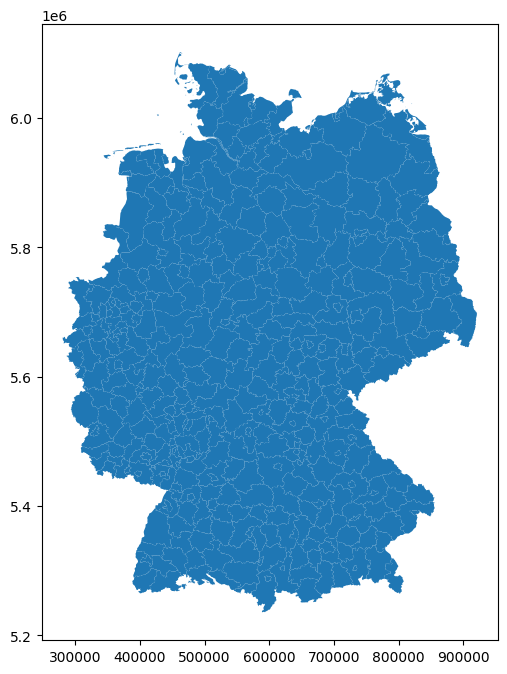

In [11]:
districts.plot(figsize=(12,8))

In [12]:
districts['AGS'].nunique()

400

In [13]:
districts['AGS'].value_counts().head(10)

AGS
01051    3
01056    3
03457    3
01001    2
13003    2
03359    2
03402    2
03405    2
03452    2
03455    2
Name: count, dtype: int64

In [14]:
districts['EWZ'].sum()

83237124

In [15]:
%%time

districts_dissolved = districts[['AGS', 'GEN', 'BEZ', 'EWZ', 'geometry']].dissolve(by=['AGS', 'GEN', 'BEZ'], aggfunc='sum').reset_index()

CPU times: user 325 ms, sys: 7.3 ms, total: 332 ms
Wall time: 342 ms


In [16]:
districts_dissolved['AGS'].nunique()

400

In [17]:
districts_dissolved['AGS'].value_counts().head(10)

AGS
01001    1
09374    1
09473    1
09472    1
09471    1
09464    1
09463    1
09462    1
09461    1
09377    1
Name: count, dtype: int64

In [18]:
districts_dissolved['EWZ'].sum()

83237124

In [19]:
districts_dissolved = districts_dissolved.rename(columns={'AGS': 'Key', 'GEN': 'District', 'BEZ': 'Type', 'EWZ': 'Population'})

In [20]:
districts_dissolved['geometry'] = districts_dissolved['geometry'].to_crs({'proj':'cea'})
districts_dissolved['Area'] = round(districts_dissolved['geometry'].area / 10 ** 6, 0).astype(int) # km²
districts_dissolved['Density'] = round(districts_dissolved['Population'] / districts_dissolved['Area'], 0).astype(int)

In [21]:
districts_dissolved

,Key,District,Type,geometry,Population,Area,Density
0,01001,Flensburg,Kreisfreie Stadt,"POLYGON ((1047870.613 5193827.071, 1047892.055...",91113,57,1598
1,01002,Kiel,Kreisfreie Stadt,"POLYGON ((1131812.380 5163443.488, 1131859.020...",246243,120,2052
2,01003,Lübeck,Kreisfreie Stadt,"POLYGON ((1210803.734 5139680.433, 1211026.580...",216277,212,1020
3,01004,Neumünster,Kreisfreie Stadt,"POLYGON ((1112687.973 5150308.166, 1112875.749...",79496,72,1104
4,01051,Dithmarschen,Kreis,"MULTIPOLYGON (((1024068.728 5132807.410, 10241...",133969,1444,93
...,...,...,...,...,...,...,...
395,16073,Saalfeld-Rudolstadt,Landkreis,"POLYGON ((1253789.726 4925163.814, 1254018.515...",100969,1009,100
396,16074,Saale-Holzland-Kreis,Landkreis,"POLYGON ((1302213.072 4942734.566, 1302234.373...",82513,816,101
397,16075,Saale-Orla-Kreis,Landkreis,"POLYGON ((1316913.296 4922107.002, 1316942.737...",79030,1152,69
398,16076,Greiz,Landkreis,"POLYGON ((1357170.082 4934324.731, 1357483.268...",96102,846,114


## Other indicators

- income
- taxes
- age
- unemployment
- child care
- property prices
- land cover
- climate risk

## Save indicators

In [22]:
districts_dissolved.to_file('indicators.shp')